In [1]:
import pandas as pd


In [5]:
# 3 ETL
entidade = pd.read_csv('sample_data/vendas.csv', sep=';')
display(entidade)
# 4 Ajuste de Dados (Preparação da base - limpeza)
print(entidade.info())
#entidade.head()

print(entidade.head())


,Preco,TipoBem,TipoVenda,Ano,Comprimento,Largura,Material
0,1256,4,1,2003,4,3,12
1,1182,2,5,2013,1,4,10
2,1524,1,4,2004,4,4,9
3,4515,4,5,2003,3,3,2
4,6603,2,5,2011,3,4,12
...,...,...,...,...,...,...,...
2995,7719,1,4,2001,3,4,6
2996,8563,1,5,2020,3,4,12
2997,1206,2,5,2021,4,5,11
2998,3587,4,5,2005,3,5,9


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Preco        3000 non-null   int64
 1   TipoBem      3000 non-null   int64
 2   TipoVenda    3000 non-null   int64
 3   Ano          3000 non-null   int64
 4   Comprimento  3000 non-null   int64
 5   Largura      3000 non-null   int64
 6   Material     3000 non-null   int64
dtypes: int64(7)
memory usage: 164.2 KB
None
   Preco  TipoBem  TipoVenda   Ano  Comprimento  Largura  Material
0   1256        4          1  2003            4        3        12
1   1182        2          5  2013            1        4        10
2   1524        1          4  2004            4        4         9
3   4515        4          5  2003            3        3         2
4   6603        2          5  2011            3        4        12


Correlação entre as variáveis

,population
longitude,0.111572
latitude,-0.117318
housing_median_age,-0.299888
total_rooms,0.838867
total_bedrooms,0.856387
population,1.000000
households,0.895530
median_income,0.032361
median_house_value,-0.001192


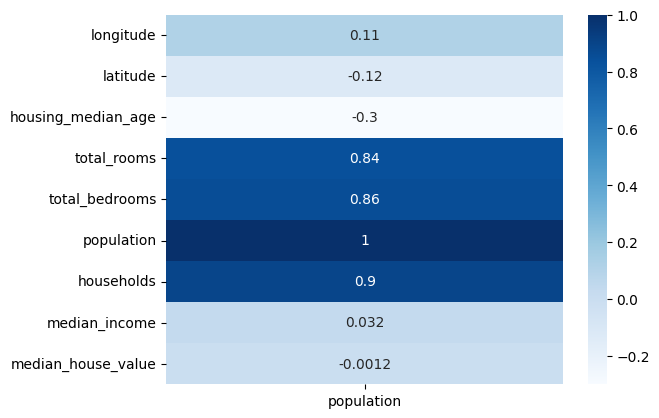

In [ ]:
# 5 analise explaratoria
# display(entidade.corr())
#correlacao = entidade.corr()
#display(correlacao)
correlacao2 = entidade.corr()[['population']] 
display(correlacao2[['population']])

import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(correlacao2, cmap='Blues', annot=True) # criar o gráfico
plt.show() #exibir o gráfico

Modelagem + Algoritmo = talvez IA
dividir a base em x e y

In [ ]:
y = entidade['population']
# axis = 0 , linhas e axis = 1, colunas
x = entidade.drop('population', axis=1)
x = entidade.drop('median_house_value', axis=1)

from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=1)

IA

In [ ]:

# Importar a IA
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# criar a IA
modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()

# treinar a IA
modelo_regressaolinear.fit(x_treino, y_treino)
modelo_arvoredecisao.fit(x_treino, y_treino)

# RandomForestRegressor()


RandomForestRegressor()

In [ ]:
# escolher o melhor modelo R2
from sklearn.metrics import r2_score

previsao_regressaolinear = modelo_regressaolinear.predict(x_teste)
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_teste)

print(r2_score(y_teste, previsao_regressaolinear))
print(r2_score(y_teste, previsao_arvoredecisao))

1.0
0.9994851446650257


Previsões

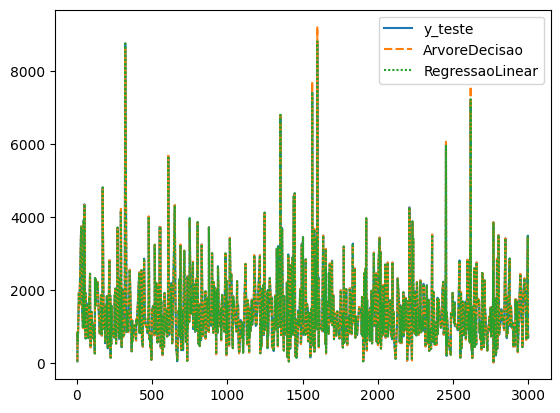

In [ ]:
entidade_aux = pd.DataFrame()
entidade_aux['y_teste'] = y_teste
entidade_aux['ArvoreDecisao'] = previsao_arvoredecisao
entidade_aux['RegressaoLinear'] = previsao_regressaolinear

sns.lineplot(data=entidade_aux)
plt.show()

Fazer Previsões

In [ ]:
entidade_nova = pd.read_csv('sample_data/california2.csv', sep=';')
display(entidade_nova.info())
#print(entidade_nova)
#entidade_nova.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 1 columns):
 #   Column                                                                                                                                   Non-Null Count  Dtype 
---  ------                                                                                                                                   --------------  ----- 
 0   longitude,"latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income","median_house_value"  3000 non-null   object
dtypes: object(1)
memory usage: 23.6+ KB


None

In [ ]:
previsao = modelo_arvoredecisao.predict(entidade_nova)
print(previsao)

ValueError: ignored